In [18]:
import pandas as pd
import ast
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations


In [19]:
base_dir= '../../../../T5 EVO/fmri/Fahime'

In [20]:
def compute_split_half_avg(a,cid_rows, n_repetition, n_voxels):
    # Create 3D array for this CID's data
    array_3d = np.zeros((n_repetition, 11, n_voxels))
    for row_idx, (_, row) in enumerate(cid_rows.iterrows()):
        for col_idx, col in enumerate(a.columns.difference(['CID', 'subject', 'roi', 'run', 'session', 'set'])):
            array_3d[row_idx, :, col_idx] = row[col]

    # Randomly split repetitions into two halves
    split_idx = np.random.permutation(n_repetition)
    half1_idx = split_idx[:n_repetition // 2]
    half2_idx = split_idx[n_repetition // 2:]

    # Average the two halves
    avg_half1 = array_3d[half1_idx].mean(axis=0)  # Shape: (11, n_voxels)
    avg_half2 = array_3d[half2_idx].mean(axis=0)  # Shape: (11, n_voxels)

    #compute the pick average
    peak_avg_half1 = np.max(avg_half1, axis=0)
    peak_avg_half2 = np.max(avg_half2, axis=0)


    # Compute correlation for each voxel


    return peak_avg_half1,peak_avg_half2

In [13]:
num_splits = 10

for subject in [1,2,3]:
    for roi in ['APC','PPC','Amygdala','OFC']:

        df_all = pd.DataFrame()

        a = pd.read_csv(base_dir+f"/single_trial/fmri_{subject}_{roi}.csv")
        a_copy = a.copy()
        for col in a.columns.difference(['CID','subject','roi','run','session','set']):
            a_copy[col] = a_copy[col].apply(ast.literal_eval)

        # list_of_3d_arrays = [



        unique_cids = a_copy['CID'].unique()
        n_voxels = len([col for col in a_copy.columns.difference(['CID','subject','roi','run','session','set'])])

        voxel_corrs = np.zeros((num_splits, n_voxels))
        for split_idx in range(num_splits):
            print(f"Subject {subject}, ROI {roi}, Split {split_idx}")
            split_corrs = []# Store correlations across all splits for each voxel


            half_avgs = np.zeros((2,len(unique_cids),n_voxels))
            for cid_idx,cid in enumerate(unique_cids):
                cid_rows = a_copy[a_copy['CID'] == cid]
                n_repetition = len(cid_rows)

                peak_avg_half1,peak_avg_half2 = compute_split_half_avg(a,cid_rows, n_repetition, n_voxels)
                half_avgs[0,cid_idx] = peak_avg_half1
                half_avgs[1,cid_idx] = peak_avg_half2




            #replace the nans and infs with zeros
            half_avgs = np.nan_to_num(half_avgs)
            half_avgs = np.where(np.isinf(half_avgs), 0, half_avgs)
            corr_vals = np.array([pearsonr(half_avgs[0, :,v], half_avgs[1,:, v])[0] for v in range(n_voxels)])
            corr_vals = np.sqrt((2*corr_vals)/(1+corr_vals))
            # voxel_corrs[split_idx] = corr_vals

            #apply spearman brown correction




            #save in a dataframe together with the subject, roi, split_idx
            fmri_df = pd.DataFrame(corr_vals, columns=['fmri'])
            fmri_df['voxel'] = np.arange(n_voxels)
            fmri_df['subject'] = subject
            fmri_df['roi'] = roi
            fmri_df['split_idx'] = split_idx
            df_all = pd.concat([df_all, fmri_df], axis=0)

        df_all.to_csv(base_dir+f"/noise_ceiling_{subject}_{roi}.csv", index=False)


Subject 1, ROI APC, Split 0
Subject 1, ROI APC, Split 1
Subject 1, ROI APC, Split 2
Subject 1, ROI APC, Split 3
Subject 1, ROI APC, Split 4
Subject 1, ROI APC, Split 5
Subject 1, ROI APC, Split 6
Subject 1, ROI APC, Split 7
Subject 1, ROI APC, Split 8
Subject 1, ROI APC, Split 9
Subject 1, ROI PPC, Split 0
Subject 1, ROI PPC, Split 1
Subject 1, ROI PPC, Split 2
Subject 1, ROI PPC, Split 3
Subject 1, ROI PPC, Split 4
Subject 1, ROI PPC, Split 5
Subject 1, ROI PPC, Split 6
Subject 1, ROI PPC, Split 7
Subject 1, ROI PPC, Split 8
Subject 1, ROI PPC, Split 9
Subject 1, ROI Amygdala, Split 0
Subject 1, ROI Amygdala, Split 1
Subject 1, ROI Amygdala, Split 2
Subject 1, ROI Amygdala, Split 3
Subject 1, ROI Amygdala, Split 4
Subject 1, ROI Amygdala, Split 5
Subject 1, ROI Amygdala, Split 6
Subject 1, ROI Amygdala, Split 7
Subject 1, ROI Amygdala, Split 8
Subject 1, ROI Amygdala, Split 9
Subject 1, ROI OFC, Split 0


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 1, ROI OFC, Split 1


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 1, ROI OFC, Split 2


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 1, ROI OFC, Split 3


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 1, ROI OFC, Split 4


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 1, ROI OFC, Split 5


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 1, ROI OFC, Split 6


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 1, ROI OFC, Split 7


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/s8/bznqh0v13ddg31lz919tkrmc0000gn/T/ipykernel_53534/739174471.py:42: RuntimeWarning: invalid value encountered in sqrt
  corr_vals = np.sqrt((2*corr_vals)/(1+corr_vals))


Subject 1, ROI OFC, Split 8


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 1, ROI OFC, Split 9


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/s8/bznqh0v13ddg31lz919tkrmc0000gn/T/ipykernel_53534/739174471.py:42: RuntimeWarning: invalid value encountered in sqrt
  corr_vals = np.sqrt((2*corr_vals)/(1+corr_vals))


Subject 2, ROI APC, Split 0
Subject 2, ROI APC, Split 1
Subject 2, ROI APC, Split 2
Subject 2, ROI APC, Split 3
Subject 2, ROI APC, Split 4
Subject 2, ROI APC, Split 5
Subject 2, ROI APC, Split 6
Subject 2, ROI APC, Split 7
Subject 2, ROI APC, Split 8
Subject 2, ROI APC, Split 9
Subject 2, ROI PPC, Split 0


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/s8/bznqh0v13ddg31lz919tkrmc0000gn/T/ipykernel_53534/739174471.py:42: RuntimeWarning: invalid value encountered in sqrt
  corr_vals = np.sqrt((2*corr_vals)/(1+corr_vals))


Subject 2, ROI PPC, Split 1


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 2, ROI PPC, Split 2


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 2, ROI PPC, Split 3


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/s8/bznqh0v13ddg31lz919tkrmc0000gn/T/ipykernel_53534/739174471.py:42: RuntimeWarning: invalid value encountered in sqrt
  corr_vals = np.sqrt((2*corr_vals)/(1+corr_vals))


Subject 2, ROI PPC, Split 4


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 2, ROI PPC, Split 5


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 2, ROI PPC, Split 6


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 2, ROI PPC, Split 7


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 2, ROI PPC, Split 8


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 2, ROI PPC, Split 9


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 2, ROI Amygdala, Split 0


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 2, ROI Amygdala, Split 1


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 2, ROI Amygdala, Split 2


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 2, ROI Amygdala, Split 3


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 2, ROI Amygdala, Split 4


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 2, ROI Amygdala, Split 5


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 2, ROI Amygdala, Split 6


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 2, ROI Amygdala, Split 7


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 2, ROI Amygdala, Split 8


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 2, ROI Amygdala, Split 9


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 2, ROI OFC, Split 0


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/s8/bznqh0v13ddg31lz919tkrmc0000gn/T/ipykernel_53534/739174471.py:42: RuntimeWarning: invalid value encountered in sqrt
  corr_vals = np.sqrt((2*corr_vals)/(1+corr_vals))


Subject 2, ROI OFC, Split 1


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/s8/bznqh0v13ddg31lz919tkrmc0000gn/T/ipykernel_53534/739174471.py:42: RuntimeWarning: invalid value encountered in sqrt
  corr_vals = np.sqrt((2*corr_vals)/(1+corr_vals))


Subject 2, ROI OFC, Split 2


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/s8/bznqh0v13ddg31lz919tkrmc0000gn/T/ipykernel_53534/739174471.py:42: RuntimeWarning: invalid value encountered in sqrt
  corr_vals = np.sqrt((2*corr_vals)/(1+corr_vals))


Subject 2, ROI OFC, Split 3


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/s8/bznqh0v13ddg31lz919tkrmc0000gn/T/ipykernel_53534/739174471.py:42: RuntimeWarning: invalid value encountered in sqrt
  corr_vals = np.sqrt((2*corr_vals)/(1+corr_vals))


Subject 2, ROI OFC, Split 4


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/s8/bznqh0v13ddg31lz919tkrmc0000gn/T/ipykernel_53534/739174471.py:42: RuntimeWarning: invalid value encountered in sqrt
  corr_vals = np.sqrt((2*corr_vals)/(1+corr_vals))


Subject 2, ROI OFC, Split 5


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/s8/bznqh0v13ddg31lz919tkrmc0000gn/T/ipykernel_53534/739174471.py:42: RuntimeWarning: invalid value encountered in sqrt
  corr_vals = np.sqrt((2*corr_vals)/(1+corr_vals))


Subject 2, ROI OFC, Split 6


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/s8/bznqh0v13ddg31lz919tkrmc0000gn/T/ipykernel_53534/739174471.py:42: RuntimeWarning: invalid value encountered in sqrt
  corr_vals = np.sqrt((2*corr_vals)/(1+corr_vals))


Subject 2, ROI OFC, Split 7


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 2, ROI OFC, Split 8


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/s8/bznqh0v13ddg31lz919tkrmc0000gn/T/ipykernel_53534/739174471.py:42: RuntimeWarning: invalid value encountered in sqrt
  corr_vals = np.sqrt((2*corr_vals)/(1+corr_vals))


Subject 2, ROI OFC, Split 9


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/s8/bznqh0v13ddg31lz919tkrmc0000gn/T/ipykernel_53534/739174471.py:42: RuntimeWarning: invalid value encountered in sqrt
  corr_vals = np.sqrt((2*corr_vals)/(1+corr_vals))


Subject 3, ROI APC, Split 0
Subject 3, ROI APC, Split 1
Subject 3, ROI APC, Split 2
Subject 3, ROI APC, Split 3
Subject 3, ROI APC, Split 4
Subject 3, ROI APC, Split 5
Subject 3, ROI APC, Split 6
Subject 3, ROI APC, Split 7
Subject 3, ROI APC, Split 8
Subject 3, ROI APC, Split 9
Subject 3, ROI PPC, Split 0
Subject 3, ROI PPC, Split 1
Subject 3, ROI PPC, Split 2
Subject 3, ROI PPC, Split 3
Subject 3, ROI PPC, Split 4
Subject 3, ROI PPC, Split 5
Subject 3, ROI PPC, Split 6
Subject 3, ROI PPC, Split 7
Subject 3, ROI PPC, Split 8
Subject 3, ROI PPC, Split 9
Subject 3, ROI Amygdala, Split 0
Subject 3, ROI Amygdala, Split 1
Subject 3, ROI Amygdala, Split 2
Subject 3, ROI Amygdala, Split 3
Subject 3, ROI Amygdala, Split 4
Subject 3, ROI Amygdala, Split 5
Subject 3, ROI Amygdala, Split 6
Subject 3, ROI Amygdala, Split 7
Subject 3, ROI Amygdala, Split 8
Subject 3, ROI Amygdala, Split 9
Subject 3, ROI OFC, Split 0


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 3, ROI OFC, Split 1


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 3, ROI OFC, Split 2


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 3, ROI OFC, Split 3


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 3, ROI OFC, Split 4


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 3, ROI OFC, Split 5


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Subject 3, ROI OFC, Split 6


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/s8/bznqh0v13ddg31lz919tkrmc0000gn/T/ipykernel_53534/739174471.py:42: RuntimeWarning: invalid value encountered in sqrt
  corr_vals = np.sqrt((2*corr_vals)/(1+corr_vals))


Subject 3, ROI OFC, Split 7


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/s8/bznqh0v13ddg31lz919tkrmc0000gn/T/ipykernel_53534/739174471.py:42: RuntimeWarning: invalid value encountered in sqrt
  corr_vals = np.sqrt((2*corr_vals)/(1+corr_vals))


Subject 3, ROI OFC, Split 8


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/s8/bznqh0v13ddg31lz919tkrmc0000gn/T/ipykernel_53534/739174471.py:42: RuntimeWarning: invalid value encountered in sqrt
  corr_vals = np.sqrt((2*corr_vals)/(1+corr_vals))


Subject 3, ROI OFC, Split 9


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/s8/bznqh0v13ddg31lz919tkrmc0000gn/T/ipykernel_53534/739174471.py:42: RuntimeWarning: invalid value encountered in sqrt
  corr_vals = np.sqrt((2*corr_vals)/(1+corr_vals))


In [11]:

def compute_split_session(a,cid_rows, n_voxels,s1,s2):
    # Create 3D array for this CID's data
    session1_rows = cid_rows[cid_rows['session'] == s1]
    session2_rows = cid_rows[cid_rows['session'] == s2]

    if session1_rows.empty or session2_rows.empty:
        print("empty")
        return None, None
        # Skip if one of the sessions is missing

    n_repetition1 = len(session1_rows)
    n_repetition2 = len(session2_rows)

    array_3d_s1 = np.zeros((n_repetition1, 11, n_voxels))
    array_3d_s2 = np.zeros((n_repetition2, 11, n_voxels))

    for row_idx, (_, row) in enumerate(session1_rows.iterrows()):
        for col_idx, col in enumerate(a.columns.difference(['CID', 'subject', 'roi', 'run', 'session', 'set'])):
            array_3d_s1[row_idx, :, col_idx] = row[col]

    for row_idx, (_, row) in enumerate(session2_rows.iterrows()):
        for col_idx, col in enumerate(a.columns.difference(['CID', 'subject', 'roi', 'run', 'session', 'set'])):
            array_3d_s2[row_idx, :, col_idx] = row[col]

    # Average over repetitions for each session
    avg_s1 = array_3d_s1.mean(axis=0)
    avg_s2 = array_3d_s2.mean(axis=0)

    # Compute peak average
    peak_avg_s1 = np.max(avg_s1, axis=0)
    peak_avg_s2 = np.max(avg_s2, axis=0)

    # Compute correlation for each voxel


    return peak_avg_s1,peak_avg_s2

array([2, 3, 4])

In [22]:
# num_splits = 10

# for subject in [3]:
for subject in [1]:
    for roi in ['PirF','PirT','AMY','OFC']:
    # for roi in ['OFC']:

        df_all = pd.DataFrame()

        a = pd.read_csv(base_dir+f"/single_trial/fmri_{subject}_{roi}.csv")
        a_copy = a.copy()
        for col in a.columns.difference(['CID','subject','roi','run','session','set']):
            a_copy[col] = a_copy[col].apply(ast.literal_eval)

        # list_of_3d_arrays = [



        unique_cids = a_copy['CID'].unique()
        unique_sessions= a_copy['session'].unique()
        n_voxels = len([col for col in a_copy.columns.difference(['CID','subject','roi','run','session','set'])])

        # voxel_corrs = np.zeros((3, n_voxels))


        session_pairs  = list(combinations(unique_sessions, 2))  # Define session pairs
        # results = {}

        for session1, session2 in session_pairs:
        # for split_idx in range(num_splits):
            print(f"Subject {subject}, ROI {roi}, Split {session1}-{session2}")
            split_corrs = []# Store correlations across all splits for each voxel


            half_avgs = np.zeros((2,len(unique_cids),n_voxels))
            for cid_idx,cid in enumerate(unique_cids):
                cid_rows = a_copy[a_copy['CID'] == cid]
                n_repetition = len(cid_rows)

                peak_avg_half1,peak_avg_half2 = compute_split_session(a,cid_rows, n_voxels,session1,session2)
                half_avgs[0,cid_idx] = peak_avg_half1
                half_avgs[1,cid_idx] = peak_avg_half2




            #replace the nans and infs with zeros
            half_avgs = np.nan_to_num(half_avgs)
            half_avgs = np.where(np.isinf(half_avgs), 0, half_avgs)
            corr_vals = np.array([pearsonr(half_avgs[0, :,v], half_avgs[1,:, v])[0] for v in range(n_voxels)])
            corr_vals = np.sqrt((2*corr_vals)/(1+corr_vals))

            corr_vals = np.nan_to_num(corr_vals)
            corr_vals = np.where(np.isinf(corr_vals), 0, corr_vals)


            # voxel_corrs[split_idx] = corr_vals

            #apply spearman brown correction




            #save in a dataframe together with the subject, roi, split_idx
            fmri_df = pd.DataFrame(corr_vals, columns=['fmri'])
            fmri_df['voxel'] = np.arange(n_voxels)
            fmri_df['subject'] = subject
            fmri_df['roi'] = roi
            fmri_df['s1'] = session1
            fmri_df['s2'] = session2
            df_all = pd.concat([df_all, fmri_df], axis=0)

        df_all.to_csv(base_dir+f"/noise_ceiling_session_{subject}_{roi}.csv", index=False)


Subject 1, ROI PirF, Split 1-2


/var/folders/s8/bznqh0v13ddg31lz919tkrmc0000gn/T/ipykernel_8117/3027861395.py:51: RuntimeWarning: invalid value encountered in sqrt
  corr_vals = np.sqrt((2*corr_vals)/(1+corr_vals))


Subject 1, ROI PirF, Split 1-3


/var/folders/s8/bznqh0v13ddg31lz919tkrmc0000gn/T/ipykernel_8117/3027861395.py:51: RuntimeWarning: invalid value encountered in sqrt
  corr_vals = np.sqrt((2*corr_vals)/(1+corr_vals))


Subject 1, ROI PirF, Split 2-3
Subject 1, ROI PirT, Split 1-2


/var/folders/s8/bznqh0v13ddg31lz919tkrmc0000gn/T/ipykernel_8117/3027861395.py:51: RuntimeWarning: invalid value encountered in sqrt
  corr_vals = np.sqrt((2*corr_vals)/(1+corr_vals))


Subject 1, ROI PirT, Split 1-3


/var/folders/s8/bznqh0v13ddg31lz919tkrmc0000gn/T/ipykernel_8117/3027861395.py:51: RuntimeWarning: invalid value encountered in sqrt
  corr_vals = np.sqrt((2*corr_vals)/(1+corr_vals))


Subject 1, ROI PirT, Split 2-3
Subject 1, ROI AMY, Split 1-2


/var/folders/s8/bznqh0v13ddg31lz919tkrmc0000gn/T/ipykernel_8117/3027861395.py:51: RuntimeWarning: invalid value encountered in sqrt
  corr_vals = np.sqrt((2*corr_vals)/(1+corr_vals))


Subject 1, ROI AMY, Split 1-3


/var/folders/s8/bznqh0v13ddg31lz919tkrmc0000gn/T/ipykernel_8117/3027861395.py:51: RuntimeWarning: invalid value encountered in sqrt
  corr_vals = np.sqrt((2*corr_vals)/(1+corr_vals))


Subject 1, ROI AMY, Split 2-3
Subject 1, ROI OFC, Split 1-2


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/s8/bznqh0v13ddg31lz919tkrmc0000gn/T/ipykernel_8117/3027861395.py:51: RuntimeWarning: invalid value encountered in sqrt
  corr_vals = np.sqrt((2*corr_vals)/(1+corr_vals))


Subject 1, ROI OFC, Split 1-3


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/s8/bznqh0v13ddg31lz919tkrmc0000gn/T/ipykernel_8117/3027861395.py:51: RuntimeWarning: invalid value encountered in sqrt
  corr_vals = np.sqrt((2*corr_vals)/(1+corr_vals))


Subject 1, ROI OFC, Split 2-3


/Users/farzaneh/opt/anaconda3/envs/open_pom/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/s8/bznqh0v13ddg31lz919tkrmc0000gn/T/ipykernel_8117/3027861395.py:51: RuntimeWarning: invalid value encountered in sqrt
  corr_vals = np.sqrt((2*corr_vals)/(1+corr_vals))


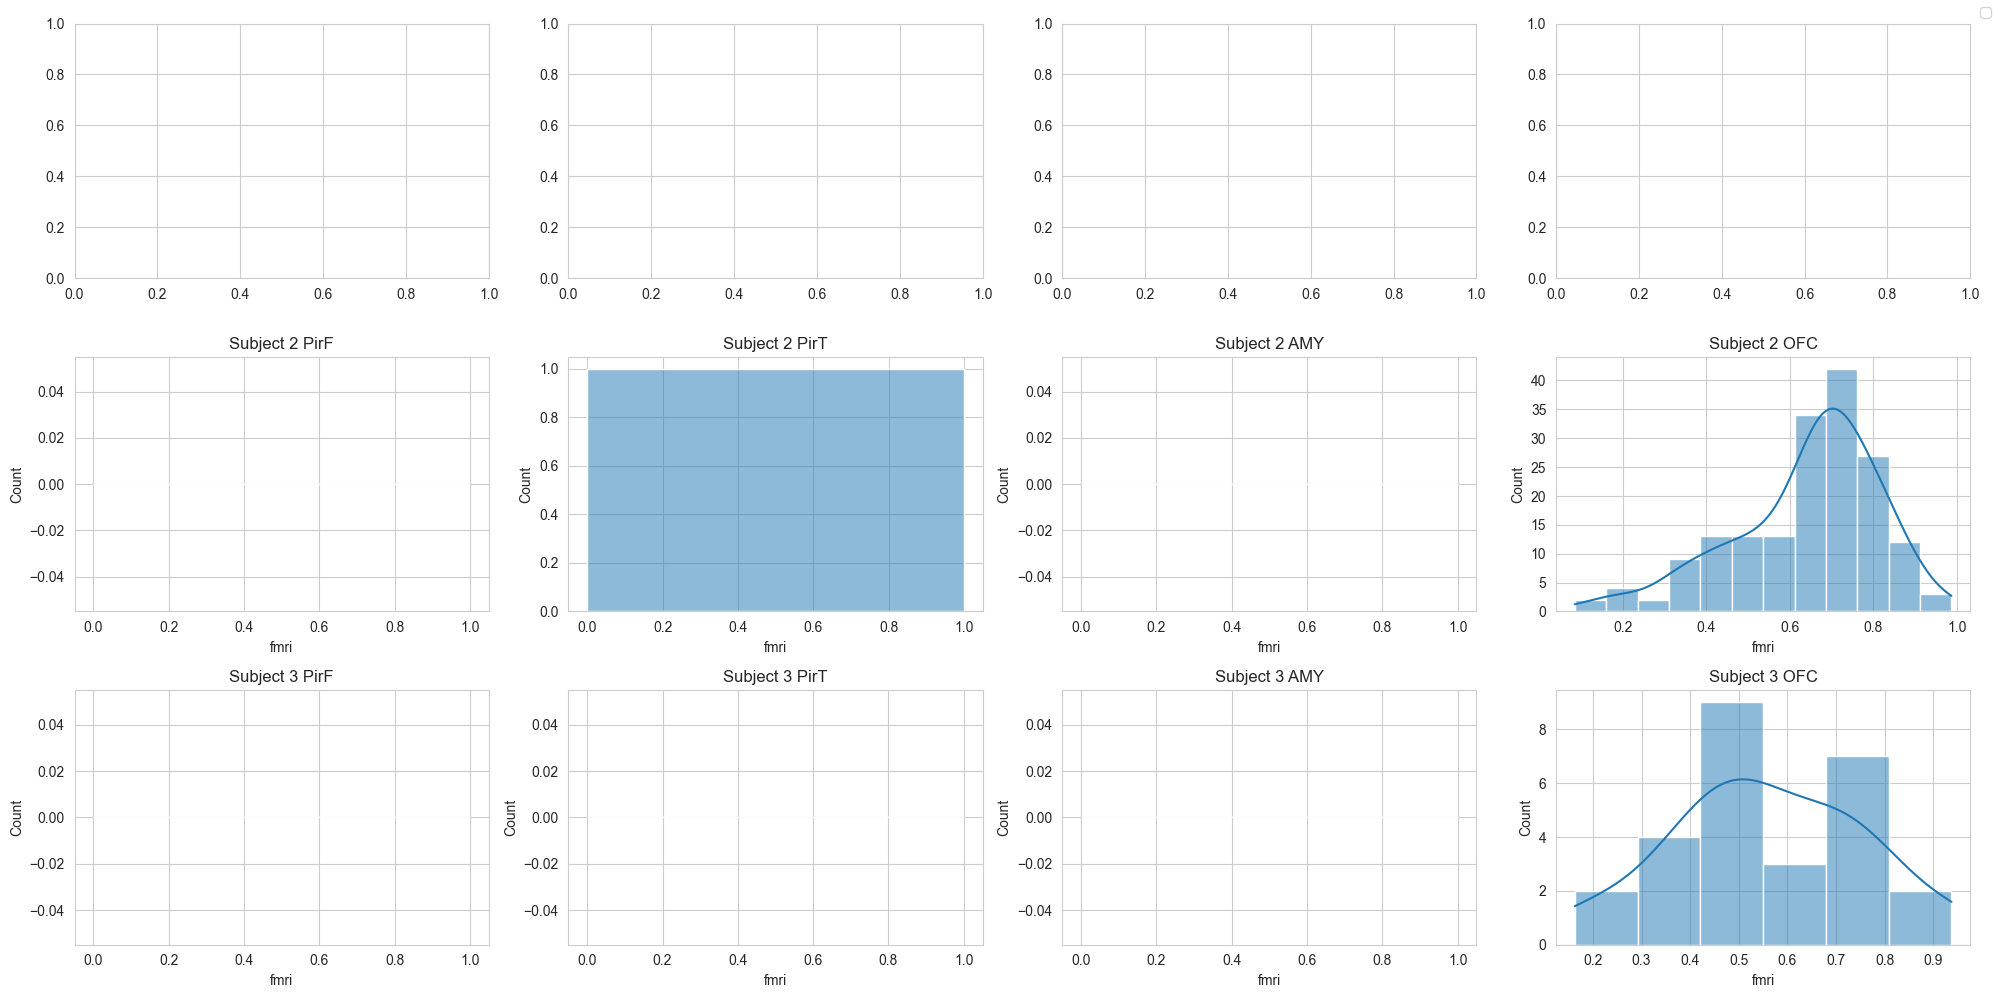

In [23]:
fig,ax = plt.subplots(3,4,figsize=(20,10))
#rw<masks>nii = masks for PirF (rw.APC,nii), PirT (rw.PPC.nii), AMY (rwAmygdala.nii), OFC (rwOFC.nii)

for subject in [2,3]:
    for i,roi in enumerate(["PirF","PirT","AMY","OFC"]):
        df = pd.read_csv(base_dir+f"/noise_ceiling/noise_ceiling_session_{subject}_{roi}.csv")
        df=df.groupby("voxel").mean(['fmri'])
        sns.histplot(data=df,x='fmri',ax=ax[(subject-1),i],kde=True)
        ax[subject-1,i].set_title(f"Subject {subject} {roi}")
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.tight_layout()

plt.savefig(f"{base_dir}/noise_ceiling/noiseceilingsession_hist.pdf")

In [5]:
subject=2
roi= "PirF"
df = pd.read_csv(base_dir+f"/noise_ceiling/noise_ceiling_session_{subject}_{roi}.csv")
df=df.groupby("voxel").mean(['fmri'])